In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import sklearn.decomposition as de

In [8]:
train_df = pd.read_csv('/Users/guillaumebelissent/Docs/EPFL/BA5/ML/Project/ML_Project/data/train.csv.gz', compression = 'gzip')


In [9]:
train_df

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,AC163611.1,AC163611.2,AC140365.1,AC124606.2,AC124606.1,AC133095.2,AC133095.1,AC234645.1,AC149090.1,labels
0,2.190380,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.293686,CBP
1,2.861984,0.0,0.506726,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506726,KAT5
2,2.766762,0.0,0.629614,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.683511,eGFP
3,2.146434,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.432486,CBP
4,2.840049,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.164235,eGFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.108581,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.312030,KAT5
4996,3.108972,0.0,0.783343,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.518711,eGFP
4997,2.025946,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.025946,CBP
4998,1.227544,0.0,0.791370,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,KAT5


In [ ]:
pca = de.PCA(n_components=3)
=pca.fit_transform()

In [22]:
train_df.iloc[:,:30].describe()

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,Pcmtd1,Gm26901,Gm30414,Sntg1,Rrs1,Adhfe1,2610203C22Rik,Vxn,Gm29520,Mybl1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.410639,0.023270,0.214613,0.000977,0.007074,0.000259,0.0,0.000239,0.133054,0.158978,...,0.900932,0.209503,0.000770,2.293448,0.011769,0.022862,0.012758,0.143985,0.000129,0.014364
std,0.679511,0.120015,0.363594,0.028644,0.070567,0.018315,0.0,0.012212,0.295955,0.324178,...,0.600691,0.372968,0.027718,0.731617,0.090549,0.132207,0.091567,0.364184,0.009125,0.109858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.114044,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.484914,0.000000,0.000000,1.931113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.519359,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.977625,0.000000,0.000000,2.382638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.844484,0.000000,0.426002,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.340505,0.401930,0.000000,2.779973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.260520,1.882199,1.879098,1.208683,1.342357,1.295032,0.0,0.721071,2.354503,2.532703,...,2.830636,2.354503,1.517876,4.676679,1.600853,2.070049,1.540236,2.398805,0.645245,2.108184


In [48]:
stds = train_df.describe().iloc[2,:]

In [49]:
norm_stds = stds/max(stds)

<AxesSubplot:xlabel='std', ylabel='Count'>

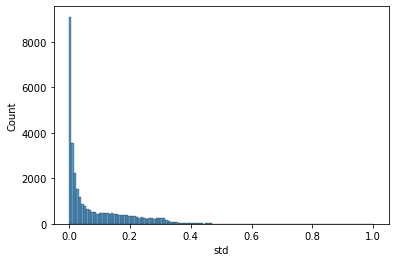

In [50]:
sns.histplot(norm_stds)

In [68]:
len(norm_stds[norm_stds>0.7])

7

<AxesSubplot:ylabel='Count'>

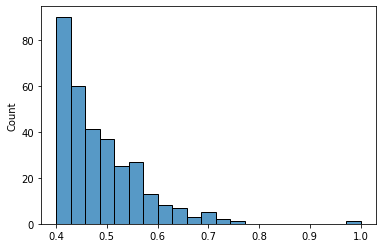

In [67]:
sns.histplot(np.sort(norm_stds[norm_stds>0.4])[::-1])